# Linear Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor

import warnings
warnings.filterwarnings("ignore")

## The Equations

### Standard equation

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dots + \theta_{n}x_{n}$ 

- $\hat{y}$ is the predicted value.
- n is the number of features.
- $x_{i}$ is the $i^{th}$ feature value.
- $\theta_{j}$ is the $j^{th}$ model parameter. 

### Vectorized equation

$\hat{y} = h_{\theta}(x) = \theta \cdot x$

- $\theta$ here is the model's parameter containing $\theta_{0} \dots \theta_{n}$.
- $x$ is the features containing $x_{0} \dots x_{n}$ where $x_{0}$ is always 1.
- $\theta \cdot x$ is the dot product between $\theta$ & x. Both are colum vectors.


$\hat{y} = \theta \cdot x = \theta^{T}x = [\theta_{0} \dots \theta_{n}] \begin{bmatrix} x_{0} \\ \vdots \\ x_{n}\end{bmatrix} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dots + \theta_{n}x_{n}$

where $x_{0} = 1$

## Training the model

We need a loss function to train this model. Out loss funciton is MSE loss.

$MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2$

Here $(i)$ is the $i^{th}$ training example.

### The Normal Equation

Without using any optimization algorithm we also have a direct formula to get the parameters, this formula is the *Normal Equation*

$\hat{\theta} = (X^{T}X)^{-1} X^{T} y$

- $\hat{\theta}$ is the estimated parameter, $\hat{\theta} \approx \theta$
- $y$ is is the target vector containing $y^{(1)} \dots y^{(m)}$

#### Examples

In [2]:
# Generate dummy data

np.random.seed(42)
m = 100
X = 2 * np.random.randn(m, 1)
y = 3 * X + np.random.randn(m, 1)

# Add bias term to X
X_b = add_dummy_feature(X)

In [3]:
X_b.shape, y.shape

((100, 2), (100, 1))

In [4]:
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # Using the normal eqaution

In [5]:
best_theta

array([[0.00742783],
       [2.92837142]])

The equation is $y = 3x + \text{Gaussian Noise}$, and you can see that the estimated $\theta_{1}$ is $2.9 \approx 3$ and $\theta_{0} = 0$

In [6]:
# Make some predictions

X_new = np.array([[0], [2]])
X_new = add_dummy_feature(X_new)

In [7]:
y_pred = X_new @ best_theta

In [8]:
y_pred

array([[0.00742783],
       [5.86417067]])

### Linear Regression with `scikit-learn`

In [9]:
lr = LinearRegression()
lr.fit(X_b, y)

LinearRegression()

In [10]:
lr.coef_

array([[0.        , 2.92837142]])

The `LinearRegression` in `sklearn` computes $X^{+}y$ where $X_{+}$ is the pseudoinverse (Moore - Penrose pseudoinverse). We can compute it directly using `np.linalg.pinv` 

In [11]:
np.linalg.pinv(X_b) @ y

array([[0.00742783],
       [2.92837142]])

### Computational Complexity

- Computing the inverse of $X^{T}X$ which is (n + 1) x (n + 1) matrix upto $O(n^{3})$. The scikit-learn Linear Regression is almost $O(n^{2})$
- However, once computed, time to make predictions is very fast. It scales $O(n)$ with the number of predictions to be made

### Gradient Descent

- This is an iterative method to find the parameters of the model
- We compute the gradient of the loss function at a particular point and move in the direction of the -ve gradient (the steepest descent)

Ex: You want to go down hill from a the top but it is very foggy, you use your feet to find the next steepest descent point

We are basically searching in the model's parameter space, so more the parameters, the harder the search becomes.

Factors affecting search:
- Learning rate determines how big of a step we are taking, too big and we may overshoot
- Shape of the function, if the loss function is complex (has lots of highs and toughs) there are chances our GD may get stuck in a *Local Minima* & not the *Global Minima*

Fortunately, MSE is a convex function all we do is go down the slope to the bottom of the bowl

#### Batch Gradient Descent

To implement GD we need to compute the partial derivative of the Loss function with each parameter of the model

$MSE(\theta) = \frac{1}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2$

$\frac{\partial MSE(\theta)}{\partial \theta_{j}} = \frac{2}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)}) x_{j}$

Rather than computing them one-by-one, we vectorize the whole stuff,

$\nabla_{\theta}MSE(\theta) = \begin{bmatrix} \frac{\partial MSE(\theta)}{\partial \theta_{0}} \\ \frac{\partial MSE(\theta)}{\partial \theta_{1}} \\ \vdots \\ \frac{\partial MSE(\theta)}{\partial \theta_{n}} \end{bmatrix} = \frac{2}{m} X^{T} (X\theta - y)$

The gradient descent step:

$\theta = \theta - \eta\nabla_{\theta}MSE(\theta)$

In [12]:
# Quick implementation

lr = 0.1
n_epochs = 1000

m = len(X_b)

theta = np.random.randn(2, 1) # Sample theta from Gaussian distribution

for _ in range(n_epochs):
    grad = (2/m) * X_b.T @ (X_b @ theta -  y)
    theta = theta - lr * grad

In [13]:
theta

array([[0.00742783],
       [2.92837142]])

In [14]:
best_theta

array([[0.00742783],
       [2.92837142]])

As we can see that the value we got from the normal equation and through GD is the same!

#### Stochastic Gradient Descent

- The issue with batch gradient descent is that it goes through the whole traininig set at once, making it very slow when the training set is huge. To solve this a better approach is SGD. It picks a random instance from the traning set and calculates the gradient based on that instance.
- This causes the loss value to bounce up and down. So unlile BGD we will not see a gradual decrease but only seeing a decrease in loss on average.
- This causes the loss to never settle even after reaching a minimum that also helps it get out of a local minima better than BGD. 
- To solve this we can use something called "simulated annealing", in which we keep decreasing the learning rate gradually (learning schedule).

In [15]:
# Implementation

n_epochs = 50

t0, t1 = 5, 50

m =  len(X_b)

theta = np.random.randn(2, 1)

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        idx = np.random.randint(m)
        Xi = X_b[idx:]
        yi = y[idx:]
        
        grad = 2 * Xi.T @ (Xi @ theta - yi) # Do not divide by m, as it's a single instance
        theta = theta - learning_schedule(epoch * m + i) * grad    

In [16]:
theta

array([[0.01630277],
       [2.92664477]])

We arrive at almost the same values but with just 50 epochs

> All data need to be Identically and Independently distributed (IID) for SGD to work correctly, if the data is sorted by label then it will start optimizing for only one label.

#### SGD with `scikit-learn`

In [17]:
sgd = SGDRegressor(
    max_iter=1000, 
    tol=1e-5, 
    eta0=0.01, 
    n_iter_no_change=100, 
    random_state=42
)
sgd.fit(X_b, y.ravel())

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [18]:
sgd.coef_

array([0.00404065, 2.92966112])

#### Mini batch Gradient Descent

In [19]:
batches = [(X_b[i:i+10], y[i:i+10]) for i in range(0, len(X_b), 10)]

In [24]:
n_epochs = 30
theta = np.random.randn(2, 1)
lr = 0.01

for epoch in range(n_epochs):
    for xi, yi in batches:
        m = len(xi)
        grad = (2/m) * xi.T @ (xi @ theta - yi)
        theta = theta - lr * grad   

In [25]:
theta

array([[0.00396903],
       [2.92040931]])

# Polynomial Regression

In [71]:
np.random.seed(42)
m = 200
X = 6 * np.random.randn(m, 1)
y = 3 * X ** 2 + X + 2 + np.random.randn(m, 1)

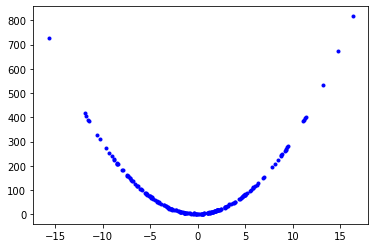

In [78]:
#| label: Random-polynomial-data
#| fig-cap: "Random Polynomial data"

plt.plot(X, y, "b.")
plt.show()

In [73]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [74]:
lr.coef_, lr.intercept_

(array([[1.76348997]]), array([95.59508332]))

Simple LR doesn't do well, that is expected. We need to create some polynomial features

In [75]:
X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

In [76]:
lr.fit(X_poly, y)

LinearRegression()

In [77]:
lr.coef_, lr.intercept_

(array([[1.01748959, 2.99727606]]), array([2.17488155]))

This does so much better, our equation $y = 3X^{2} + X + 2 + \text{Gaussian Noise}$, the predicted equation is $y = 2.99X^{2} + 1.017 X + 2.17$

# Bias/Variance Tradeoff

Model's generalization error is a sum of 3 different error:

1. **Bias**: 
- Arising due to wrong assumptions like thinking data is linear when it is quadratic.
- *High Bias* model mostly *Underfits*.

2. **Variance**:
- Arising due to model's excessive sensitivity to small variations in the data.
- Model with high degrees of freedom likely has high variance.
- *High Variance* model mostly *Overfits*.

3. **Irreducible Error**
- Arising due to noise in data.
- Only way to solve is to clean the data. 